**Experimento con LeNet sobre MNIST**

**Lectura del corpus mnist, partición train, test y normalización**

In [1]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

2023-10-18 12:31:02.684439: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-18 12:31:02.684547: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-18 12:31:02.687829: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-18 12:31:03.190618: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 12:31:05.572320: W tensorflow/compiler/

training set (60000, 28, 28)
test set (10000, 28, 28)


**Construimos la red secuencial siguiendo la estructura LeNet**

In [2]:
M = keras.Sequential()
M.add(keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)))
M.add(keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
M.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='tanh'))
M.add(keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
M.add(keras.layers.Flatten())
M.add(keras.layers.Dense(units=120, activation='tanh'))
M.add(keras.layers.Dense(units=84, activation='tanh'))
M.add(keras.layers.Dense(units=10, activation = 'softmax'))
M.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

**Compilamos el modelo con los parámetros optimizados**

Se han de definir los siguientes parámetros:

    1. Función de pérdida. Al ser un problema de clasificación emplearemos la categorical_crossentropy
    2. Optimizador. Como ejemplo aplicaremos descenso por gradiente estocástico SGD
    3. Indicar una métrica asociada a la calidad del modelo. En este caso la tasa de acierto accuracy

In [3]:
from keras.optimizers import Adagrad
sgd=Adagrad(learning_rate=0.1)
M.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

**Entrenamiento del modelo con toda la partición de train**

In [4]:
batch_size=128
epochs=5

H = M.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/5


2023-10-18 12:36:46.171402: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


 10/469 [..............................] - ETA: 8s - loss: 1.7984 - accuracy: 0.4156

2023-10-18 12:36:47.073098: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23193600 exceeds 10% of free system memory.
2023-10-18 12:36:47.073585: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23193600 exceeds 10% of free system memory.
2023-10-18 12:36:47.077684: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25171200 exceeds 10% of free system memory.
2023-10-18 12:36:47.090290: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23193600 exceeds 10% of free system memory.


469/469 [==============================] - 8s 15ms/step - loss: 0.2706 - accuracy: 0.9181 - val_loss: 0.1174 - val_accuracy: 0.9643
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0923 - accuracy: 0.9717 - val_loss: 0.0694 - val_accuracy: 0.9772
Epoch 3/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0617 - accuracy: 0.9808 - val_loss: 0.0576 - val_accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 0.0426 - val_accuracy: 0.9862
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0454 - val_accuracy: 0.9863


**Representamos gráficamente la evolución del entrenamiento (loss y accuracy)**

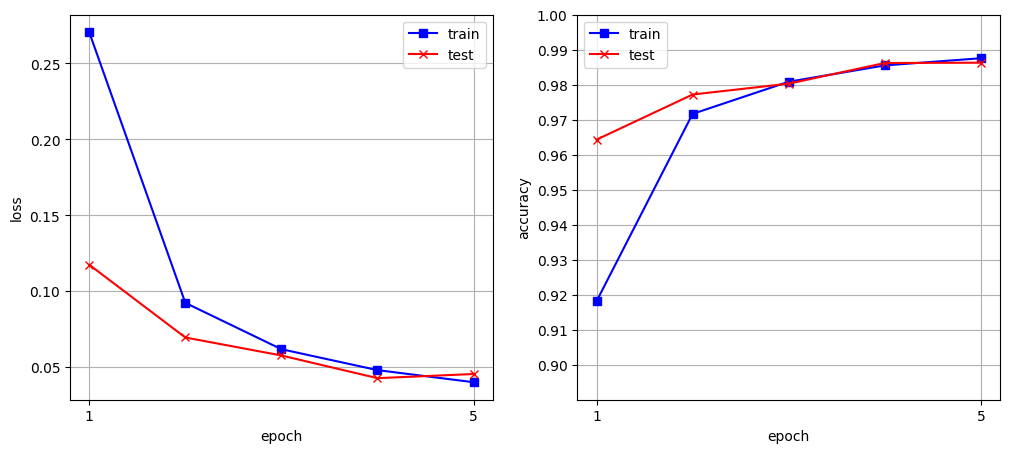

In [5]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
xx = np.arange(1, len(H.history['loss'])+1)
xticks = np.concatenate((np.array([1]), np.arange(5, len(H.history['loss'])+1, 5)))
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss');
ax.set_xticks(xticks)
ax.plot(xx, H.history['loss'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_loss'], color='r', marker='x', label='test'); ax.legend()
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xticks); ax.set_yticks(np.arange(.9, 1.01, .01)); ax.set_ylim([.89, 1.])
ax.plot(xx, H.history['accuracy'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_accuracy'], color='r', marker='x', label='test'); ax.legend();

**Guardado del modelo**

In [6]:
M.save("LeNet.keras")

**Carga y evaluación del modelo**

In [7]:
from keras.models import load_model
M = load_model("LeNet.keras")

score = M.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04536519944667816
Test accuracy: 0.986299991607666
